In [93]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

In [94]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 import
import tensorflow as tf
from tensorflow import keras as kr

import numpy as np
import matplotlib.pyplot as plt
import os
# import pandas as pd
import random

print(tf.__version__)

2.1.0


In [95]:
class_names = os.listdir("../feature/feature_fbank/")
class_names.sort()

print(class_names)
len(class_names)

['2017019740001_kwakjuheon', '2017019740002_kimjiho', '2017019740003_songyejin', '2017019740004_parksohui', '2017019740005_moonyeonwoo', '2017019740006_kangsubin', '2017019740007_leekyeongeun', '2017019740008_chochaeyeon', '2017019740009_shindonghwan', '2017019740010_kwakmirae', '2017019740011_kimhyeryeong', '2017019740012_chaeminjoon', '2017019740013_kwakyiheon', '2017019740014_leesumin', '2017019740015_choihayoung', '2017019740016_kangyeseo', '2017019740017_kwakmihyang', '2017019740018_eundano', '2017019740019_limjinju', '2017019740020_kimseongje', '2017019740021_kwakbokyeong', '2017019770001_kwonyuna', '2017019770002_kwoneunkyung', '2017019770003_johaesu', '2017019770004_leebyeongjin', '2017019770005_hyeonsanghyeok', '2017019770006_jennie', '2017019770007_simseungmin', '2017019770008_parksomi', '2017019770009_yuminji', '2017019770010_parksojin', '2017019770011_kwonyeonwoo', '2017019770012_ladakyeong', '2017019770013_janghyomin', '2017019770014_parkeunbi', '2017019770015_parkdayeung'

64

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Input, Activation, Dropout, Reshape, concatenate
from tensorflow.keras import regularizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 
import sklearn
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_predict
from tensorflow.keras.layers import Conv1D, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling1D, MaxPooling3D, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adadelta
import numpy


In [97]:
x_list = []
y_list = []

for i in range(0,len(class_names)):
    files=os.listdir("../feature/feature_fbank/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]
    #print(class_names[i].split('_')[0])

    for j in range(0, len(files)):
        #print(files[j], j)
        x = np.load("../feature/feature_fbank/"+class_names[i]+"/"+files[j])
        x=x.T
        x_list.append(x)
        y_list.append(i)
        
cv_scores, model_history = list(), list()
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train = np.array(x_list)
y_train = np.array(y_list)


In [98]:
print("y_train: ", y_train.shape)

y_train:  (320,)


In [99]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2, random_state = 42, shuffle=True)
print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (256, 469, 40)
y_train:  (256,)
x_val:  (64, 469, 40)
y_val:  (64,)


In [100]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)
    
    
x_train = x_train.reshape(-1, x_train.shape[1], x_train.shape[2], 1)
x_val   = x_val.reshape(-1, x_val.shape[1], x_val.shape[2], 1)


#x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
#x_val = (x_val - np.min(x_val)) / (np.max(x_val) - np.min(x_val))

print("x_train: ", x_train.shape)
print("x_val: ", x_val.shape)
print("y_train_encoded:", y_train_encoded.shape)
print("y_val_encoded:", y_val_encoded.shape)
print("-----------------------")

x_train:  (256, 469, 40, 1)
x_val:  (64, 469, 40, 1)
y_train_encoded: (256, 64)
y_val_encoded: (64, 64)
-----------------------


In [101]:
model = Sequential()
model.add(Dense(units=128, kernel_initializer='uniform', input_shape=(x_train.shape[1], x_train.shape[2], 1), activation='relu'))
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(len(class_names), activation='softmax'))

In [102]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 469, 40, 128)      256       
_________________________________________________________________
dense_39 (Dense)             (None, 469, 40, 32)       4128      
_________________________________________________________________
dropout_24 (Dropout)         (None, 469, 40, 32)       0         
_________________________________________________________________
dense_40 (Dense)             (None, 469, 40, 32)       1056      
_________________________________________________________________
dropout_25 (Dropout)         (None, 469, 40, 32)       0         
_________________________________________________________________
dense_41 (Dense)             (None, 469, 40, 16)       528       
_________________________________________________________________
dropout_26 (Dropout)         (None, 469, 40, 16)     

In [103]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
history = model.fit(x_train, y_train_encoded, batch_size=16, epochs=20, verbose=1, validation_data=(x_val, y_val_encoded))
val_acc = model.evaluate(x_val, y_val_encoded, batch_size=16, verbose = 1)

Train on 256 samples, validate on 64 samples
Epoch 1/20
256/256 [==============================] - 1s 4ms/sample - loss: 4.1629 - accuracy: 0.0078 - val_loss: 4.1580 - val_accuracy: 0.0312
Epoch 2/20
256/256 [==============================] - 1s 2ms/sample - loss: 4.1396 - accuracy: 0.0156 - val_loss: 4.0464 - val_accuracy: 0.0469
Epoch 3/20
256/256 [==============================] - 1s 2ms/sample - loss: 3.6812 - accuracy: 0.0586 - val_loss: 3.5444 - val_accuracy: 0.1875
Epoch 4/20
256/256 [==============================] - 1s 3ms/sample - loss: 1.2850 - accuracy: 0.7539 - val_loss: 4.9099 - val_accuracy: 0.3281
Epoch 5/20
256/256 [==============================] - 1s 3ms/sample - loss: 0.2821 - accuracy: 0.9453 - val_loss: 2.4187 - val_accuracy: 0.4844
Epoch 6/20
256/256 [==============================] - 1s 2ms/sample - loss: 0.0771 - accuracy: 0.9727 - val_loss: 2.3421 - val_accuracy: 0.4531
Epoch 7/20
256/256 [==============================] - 1s 2ms/sample - loss: 0.1552 - accura

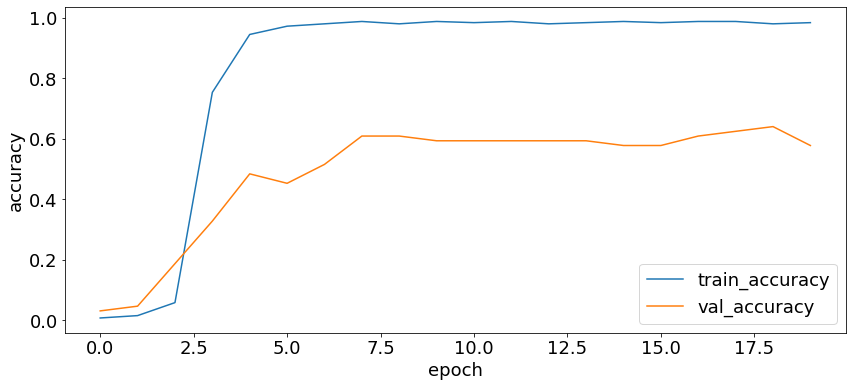

In [105]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [106]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train_encoded, verbose=0)
print("Training Accuracy: ", score)

score = model.evaluate(x_val, y_val_encoded, verbose=0)
print("Testing Accuracy: ", score)

Training Accuracy:  [0.030578315490856767, 0.98828125]
Testing Accuracy:  [1.8925540447235107, 0.578125]


In [107]:
class_names_1 = os.listdir("../feature/feature_fbank_validation/")
class_names_1.sort()

print(class_names_1)
len(class_names_1)

['2017019740001_kwakjuheon', '2017019770001_kwonyuna', '2017019880001_kimsubin']


3

In [108]:
from sklearn.metrics import accuracy_score

x_validation_list=[]
y_validation_list=[]

val_file_path = "../feature/feature_fbank_validation/"
val_class_names = os.listdir(val_file_path)
val_class_names.sort()
val_fname=[]
X_TF_pred = []
y_TF_pred = []

for i in range(0,len(val_class_names)):
    val_files=os.listdir(val_file_path+val_class_names[i])
    val_files = [file for file in val_files if file.endswith(".npy")]
    for j in range(0, len(val_files)):
        val_fname.append(val_file_path+val_class_names[i]+"/"+val_files[j])
        

for i,fname in zip(range(0,len(val_fname)), val_fname):
    tempX = np.load(val_fname[i])
    tempX = tempX.T
    x_validation_list.append(tempX)
    y_validation_list.append(val_class_names.index(fname.split('/')[3]))
    
X_TF_pred = np.array(x_validation_list)
y_TF_real_pred = np.array(y_validation_list)

X_TF_pred = X_TF_pred.reshape(-1, X_TF_pred.shape[1], X_TF_pred.shape[2], 1)

#X_TF_pred = (X_TF_pred - np.min(X_TF_pred)) / (np.max(X_TF_pred) - np.min(X_TF_pred))

pred_out = model.predict(X_TF_pred)

real =[]
pred_out_idex=[]


for i,pred in zip(range(0, len(pred_out)), pred_out) :
   
    print("Predict :",class_names[np.argmax(pred)], ", Real :", val_class_names[y_TF_real_pred[i]])
    real.append(class_names.index(val_class_names[y_TF_real_pred[i]]))
    pred_out_idex.append(np.argmax(pred))
    
# get the accuracy
print (accuracy_score(real, pred_out_idex))


Predict : 2017019880004_myeongjaewon , Real : 2017019740001_kwakjuheon
Predict : 2017019880004_myeongjaewon , Real : 2017019740001_kwakjuheon
Predict : 2017019880004_myeongjaewon , Real : 2017019740001_kwakjuheon
Predict : 2017019880004_myeongjaewon , Real : 2017019740001_kwakjuheon
Predict : 2017019740021_kwakbokyeong , Real : 2017019740001_kwakjuheon
Predict : 2017019770001_kwonyuna , Real : 2017019770001_kwonyuna
Predict : 2017019880004_myeongjaewon , Real : 2017019770001_kwonyuna
Predict : 2017019880004_myeongjaewon , Real : 2017019770001_kwonyuna
Predict : 2017019880004_myeongjaewon , Real : 2017019770001_kwonyuna
Predict : 2017019740001_kwakjuheon , Real : 2017019770001_kwonyuna
Predict : 2017019880001_kimsubin , Real : 2017019880001_kimsubin
Predict : 2017019770006_jennie , Real : 2017019880001_kimsubin
Predict : 2017019770022_heojaemin , Real : 2017019880001_kimsubin
Predict : 2017019770031_kwonnahui , Real : 2017019880001_kimsubin
Predict : 2017019770018_janggyeoul , Real : 20